In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import time
from nltk.stem import PorterStemmer

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/kenya-airways/"
pages = 10
page_size = 100

reviews = []


In [3]:
    start =time.time()
    for i in range(1,pages+1):
        print(f'scraping  page {i}')
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
        response=requests.get(url)
        content=response.content
        parsed_content=BeautifulSoup(content,'html.parser')
        review_cards=parsed_content.find_all('article',{'itemprop':'review'})
        for review in review_cards:
            title=review.find('h2',{'class':'text_header'}).text.strip()
            subtitle=review.find('h3',{'class':'text_sub_header userStatusWrapper'}).text.strip()
            traveller_elem=review.find('td',{'class':'review-value'})
            type_of_traveller=traveller_elem.text.strip() if traveller_elem else 'N/A'
            rating_elem=review.find('span',{'itemprop':'ratingValue'})
            rating = rating_elem.text.strip() if rating_elem else 'N/A'
            review_date=review.find('meta',{'itemprop':'datePublished'})['content']
            review_data=review.find('div',{'class':'text_content'}).text.strip()
            #table = review.find('table')
            
            review_details = {
            
              'Title': title,
              'Rating': rating,
              'Review Date': review_date,
              'Text': review_data,
              'Country':subtitle
              
        
            
             }
            reviews.append(review_details)
    print(f"--> {len(reviews)} total reviews")
    end=time.time()
    print('It took '+ str(end-start) ,'Seconds to Scrape '+ str(pages), 'Pages')
    
    

scraping  page 1
scraping  page 2
scraping  page 3
scraping  page 4
scraping  page 5
scraping  page 6
scraping  page 7
scraping  page 8
scraping  page 9
scraping  page 10
--> 450 total reviews
It took 22.272542476654053 Seconds to Scrape 10 Pages


In [216]:
df=pd.DataFrame(reviews)

In [217]:
df

,Title,Rating,Review Date,Text,Country
0,“Absolutely disgusting service”,1,2024-01-13,✅ Trip Verified | Absolutely disgusting servic...,Jarryd Alexander (South Africa) 13th January 2024
1,“ignores all customer service requests”,1,2024-01-09,✅ Trip Verified | Do yourself a favour and don...,N Chua (Singapore) 9th January 2024
2,"""hostesses wasn't helpful""",1,2024-01-06,✅ Trip Verified | Worst experience ever and t...,Chyree Jooste (United Arab Emirates) 6th Janua...
3,"""Worst experience ever""",1,2024-01-01,"Not Verified | Worst experience ever, they c...",L Blessy (Rwanda) 1st January 2024
4,"""worst airline you can opt for""",3,2023-12-17,Not Verified | The worst airline you can opt ...,Raamanathan Subramanian (India) 17th December ...
...,...,...,...,...,...
443,Kenya Airways customer review,6,2011-07-18,JNB-NBO-JNB. This trip showed both the good an...,A Gori (Kenya) 18th July 2011
444,Kenya Airways customer review,6,2011-07-17,Nairobi-London. Lounge in Nairobi was small an...,D Frost (United Kingdom) 17th July 2011
445,Kenya Airways customer review,2,2011-07-11,Nairobi-London. As me and my wife are both whe...,Shah Himat (Kenya) 11th July 2011
446,Kenya Airways customer review,6,2011-07-06,LUN-LLW in Economy. Adequate for a 1 hr trip. ...,J Gray (Myanmar) 6th July 2011


In [218]:
df['Country']

0      Jarryd Alexander (South Africa) 13th January 2024
1                    N Chua (Singapore) 9th January 2024
2      Chyree Jooste (United Arab Emirates) 6th Janua...
3                     L Blessy (Rwanda) 1st January 2024
4      Raamanathan Subramanian (India) 17th December ...
                             ...                        
443                        A Gori (Kenya) 18th July 2011
444              D Frost (United Kingdom) 17th July 2011
445                    Shah Himat (Kenya) 11th July 2011
446                       J Gray (Myanmar) 6th July 2011
447                   Onur Oguzhan (Kenya) 4th July 2011
Name: Country, Length: 448, dtype: object

In [219]:
df['Country']=df['Country'].str.extract(r'\((.*?)\)')

In [220]:
df['Country']

0              South Africa
1                 Singapore
2      United Arab Emirates
3                    Rwanda
4                     India
               ...         
443                   Kenya
444          United Kingdom
445                   Kenya
446                 Myanmar
447                   Kenya
Name: Country, Length: 448, dtype: object

In [221]:
df.isna().sum()

Title          0
Rating         0
Review Date    0
Text           0
Country        1
dtype: int64

In [222]:
df['Title']=df['Title'].str.replace('"','')

In [223]:
df.columns=df.columns.str.replace(' ','_')

In [224]:
df['Review_Date']=pd.to_datetime(df['Review_Date'])

In [225]:
df['Year']=df['Review_Date'].dt.year

In [226]:
df.head()

,Title,Rating,Review_Date,Text,Country,Year
0,“Absolutely disgusting service”,1,2024-01-13,✅ Trip Verified | Absolutely disgusting servic...,South Africa,2024
1,“ignores all customer service requests”,1,2024-01-09,✅ Trip Verified | Do yourself a favour and don...,Singapore,2024
2,hostesses wasn't helpful,1,2024-01-06,✅ Trip Verified | Worst experience ever and t...,United Arab Emirates,2024
3,Worst experience ever,1,2024-01-01,"Not Verified | Worst experience ever, they c...",Rwanda,2024
4,worst airline you can opt for,3,2023-12-17,Not Verified | The worst airline you can opt ...,India,2023


In [227]:
df['Reviews']=df['Text'].str.replace('✅ Trip Verified |','')

C:\Users\User\AppData\Local\Temp\ipykernel_15844\2547651032.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews']=df['Text'].str.replace('✅ Trip Verified |','')


In [230]:
df['Reviews']=df['Reviews'].str.replace('Not Verified','')

In [231]:
df['Reviews']=df['Reviews'].str.replace('|','')

C:\Users\User\AppData\Local\Temp\ipykernel_15844\461240663.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Reviews']=df['Reviews'].str.replace('|','')


In [237]:
df=df.drop(columns='Text')

In [250]:
df.head(10)

,title,rating,review_date,country,year,reviews
0,“Absolutely disgusting service”,1,2024-01-13,South Africa,2024,Absolutely disgusting service. Our outbound f...
1,“ignores all customer service requests”,1,2024-01-09,Singapore,2024,Do yourself a favour and don't ever fly Kenya...
2,hostesses wasn't helpful,1,2024-01-06,United Arab Emirates,2024,Worst experience ever and the hostesses wasn...
3,Worst experience ever,1,2024-01-01,Rwanda,2024,"Worst experience ever, they change boardin..."
4,worst airline you can opt for,3,2023-12-17,India,2023,The worst airline you can opt for. I starte...
5,zero customer service,1,2023-12-15,Australia,2023,Poor customer service and losing passenger ...
6,“delayed for almost the whole day”,2,2023-12-12,United Kingdom,2023,I write this with so much anger and pain. My...
7,It is the worst airline,3,2023-12-12,United Arab Emirates,2023,It is the worst airline. 2 hours delay at de...
8,“I genuinely enjoyed my experience”,9,2023-12-01,Canada,2023,14 hour flight and I genuinely enjoyed my exp...
9,Very good value for money,10,2023-11-26,Denmark,2023,Flew DAR-NBO-KGL 25 Nov. 2023 on Embraer 190....


In [239]:
df['Country'].value_counts()

United Kingdom                      123
South Africa                         51
Kenya                                51
United States                        37
United Arab Emirates                 18
Australia                            18
Vietnam                              12
Denmark                              12
Thailand                             11
Netherlands                          10
France                                8
Canada                                8
India                                 8
Zambia                                7
Germany                               6
Democratic Republic of the Congo      4
Nigeria                               4
Tanzania                              4
China                                 3
Switzerland                           3
Malawi                                3
Hong Kong                             3
Mauritius                             3
Ireland                               3
Uganda                                3


In [244]:
#convert all the columns to lower case
df.columns=df.columns.str.lower()

In [247]:
df['year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011], dtype=int64)

In [23]:
#df.to_csv('C:/Users/User/Desktop/Data Analytics projects dataset/british.csv')

In [251]:
#create a monthly averaging rating


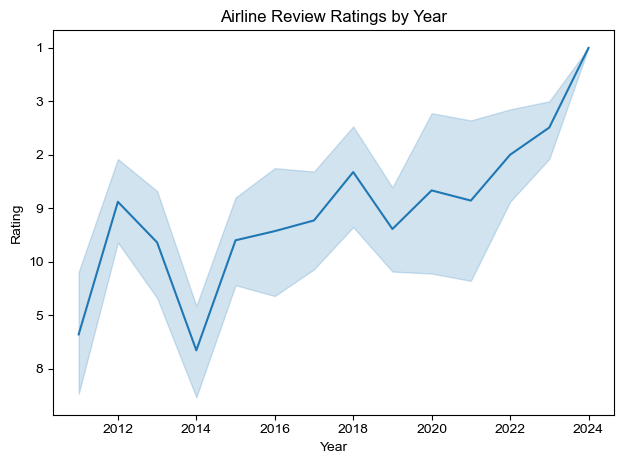

In [252]:
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x='year',y='rating',data=df)
sns.set(style="whitegrid")
plt.title('Airline Review Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [253]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [254]:
sia=SentimentIntensityAnalyzer()

In [258]:
def get_sentiment(text):
    sentiment_scores=sia.polarity_scores(text)
    if sentiment_scores['compound']>=0.05:
        return 'Positive'
    elif sentiment_scores['compound']<=-0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [259]:
df['sentiment']=df['reviews'].apply(get_sentiment)

In [261]:
df.tail(5)

,title,rating,review_date,country,year,reviews,sentiment
443,Kenya Airways customer review,6,2011-07-18,Kenya,2011,JNB-NBO-JNB. This trip showed both the good an...,Positive
444,Kenya Airways customer review,6,2011-07-17,United Kingdom,2011,Nairobi-London. Lounge in Nairobi was small an...,Positive
445,Kenya Airways customer review,2,2011-07-11,Kenya,2011,Nairobi-London. As me and my wife are both whe...,Positive
446,Kenya Airways customer review,6,2011-07-06,Myanmar,2011,LUN-LLW in Economy. Adequate for a 1 hr trip. ...,Positive
447,Kenya Airways customer review,6,2011-07-04,Kenya,2011,I fly Kenya very often (almost once every 2 we...,Positive


print('f')

In [262]:
df['sentiment'].value_counts(normalize=True)*100

Negative    51.785714
Positive    47.321429
Neutral      0.892857
Name: sentiment, dtype: float64

In [263]:
yearly_sentiment=df.groupby('year')['sentiment'].value_counts(normalize=True)*100

In [264]:
print(yearly_sentiment)

year  sentiment
2011  Positive     61.111111
      Negative     36.111111
      Neutral       2.777778
2012  Negative     58.000000
      Positive     38.000000
      Neutral       4.000000
2013  Positive     64.000000
      Negative     36.000000
2014  Positive     75.609756
      Negative     24.390244
2015  Positive     76.000000
      Negative     24.000000
2016  Negative     53.571429
      Positive     46.428571
2017  Positive     51.428571
      Negative     45.714286
      Neutral       2.857143
2018  Negative     64.705882
      Positive     35.294118
2019  Positive     51.851852
      Negative     48.148148
2020  Negative     83.333333
      Positive     16.666667
2021  Negative     57.142857
      Positive     42.857143
2022  Negative     78.787879
      Positive     21.212121
2023  Negative     66.666667
      Positive     33.333333
2024  Negative     75.000000
      Positive     25.000000
Name: sentiment, dtype: float64


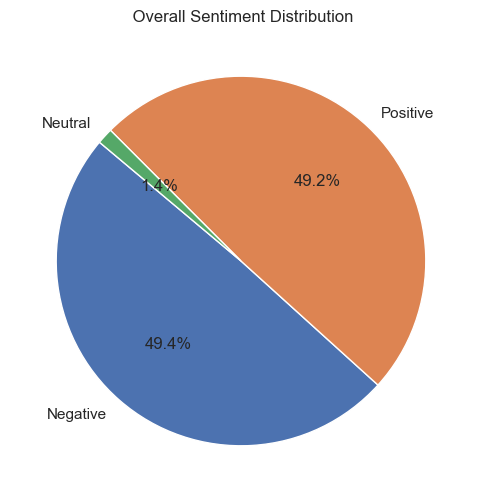

In [265]:
sentiments = ['Negative', 'Positive', 'Neutral']
percentages = [49.4, 49.2, 1.4]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size (optional)
plt.pie(percentages, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title(' Overall Sentiment Distribution')

# Display the pie chart
plt.show()

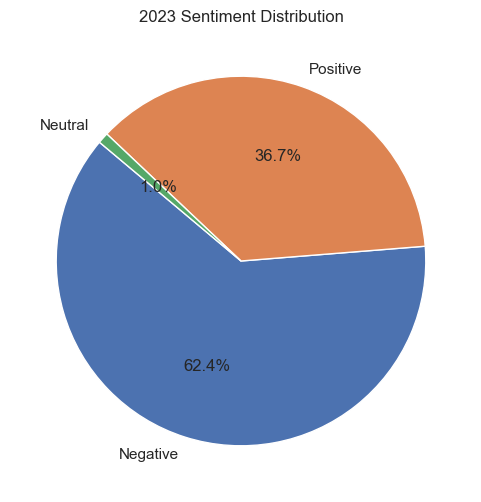

In [46]:
#sentiment in 2023
sentiments = ['Negative', 'Positive', 'Neutral']
percentages = [62.38, 36.66,  0.95]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size (optional)
plt.pie(percentages, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('2023 Sentiment Distribution')

# Display the pie chart
plt.show()

In [268]:
#create a word cloud for the reviews
review=df['reviews']

In [266]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
#stop_words = set(stopwords.words('english'))

#stemmer = PorterStemmer()

In [269]:
all_reviews=''.join(review)

In [65]:
#words = nltk.word_tokenize(all_reviews)

In [66]:
#filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

In [67]:
#filtered_text = ' '.join(filtered_words)

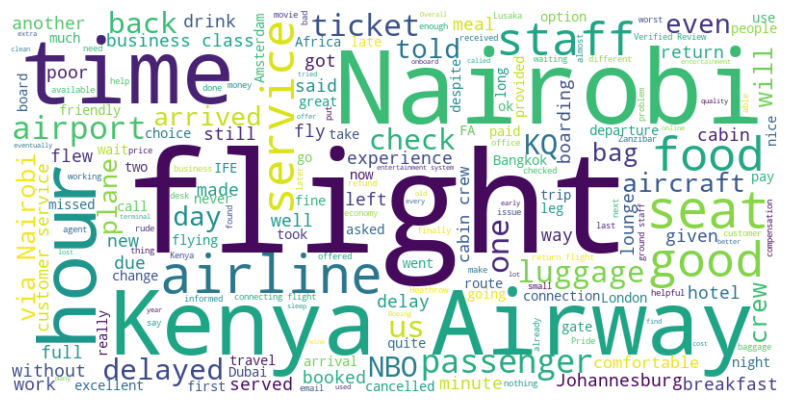

In [270]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()